In [2]:
# Importing Libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# Reading the dataset
datasetGD2 = pd.read_csv('./Solar_Power/Plant_2_Generation_Data.csv')

# See the shape of the dataset
print(datasetGD2.shape)


# Some statitistics of the dataset
datasetGD2.describe()


(67698, 7)


,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04
mean,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08
std,0.0,370.569597,362.112118,2919.448386,7.296678e+08
min,4136001.0,0.000000,0.000000,0.000000,0.000000e+00
25%,4136001.0,0.000000,0.000000,272.750000,1.996494e+07
50%,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08
75%,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09
max,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09


In [4]:
datasetGD2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [5]:
datasetGD2

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


In [6]:
datasetGD2.head(65)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
60,2020-05-15 00:30:00,4136001,oZZkBaNadn6DNKz,0.0,0.0,0.000000,1.708083e+09
61,2020-05-15 00:30:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4315.000000,3.399230e+05
62,2020-05-15 00:30:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,0.000000,1.209641e+08
63,2020-05-15 00:30:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,0.000000,2.211962e+06


In [14]:
datasetGD2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,date
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,2020-05-15
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,2020-05-15
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,2020-05-15
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,2020-05-15
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,2020-05-15


In [15]:
# adding another column for only date (without time)
datasetGD2['date'] = pd.to_datetime(datasetGD2['DATE_TIME']).dt.normalize()

In [16]:
datasetGD2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,date
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,2020-05-15
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,2020-05-15
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,2020-05-15
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,2020-05-15
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,2020-05-15


## What is the mean value of Daily Yield

In [17]:
# What is the mean value of Daily Yield
# group the rows based on "date" and take the sum from DAILY_YIELD column
meanYIELD = datasetGD2.groupby(["date"]).DAILY_YIELD.mean().reset_index()

In [18]:
meanYIELD.head()

,date,DAILY_YIELD
0,2020-05-15,3826.512932
1,2020-05-16,3425.500902
2,2020-05-17,3178.155912
3,2020-05-18,2963.582806
4,2020-05-19,2563.046769


In [19]:
# It should give exactly the number of days = 34
print(meanYIELD.shape)

(34, 2)


Text(0, 0.5, 'mean value of daily yield')

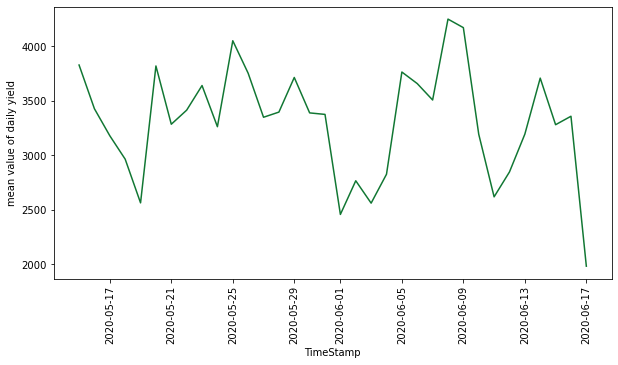

In [20]:
# plot the date and mean value of daily yield
plt.figure(figsize=(10,5))
plt.plot(meanYIELD['date'], meanYIELD['DAILY_YIELD'], color= '#117733')

plt.xticks(rotation='vertical')
plt.xlabel('TimeStamp')
plt.ylabel('mean value of daily yield')

Text(0, 0.5, 'mean value of daily yield')

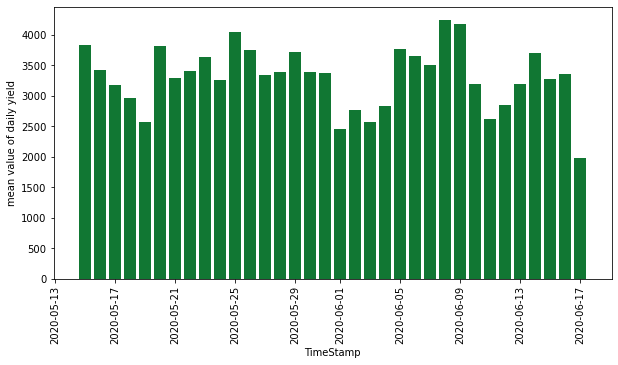

In [21]:
# plot the date and mean value of daily yield by using bar graph
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.bar(meanYIELD['date'], meanYIELD['DAILY_YIELD'], color= '#117733')

plt.xticks(rotation='vertical')
ax.set_xlabel('TimeStamp')
ax.set_ylabel('mean value of daily yield')



## How Many inverters are There for each plant

In [22]:
# how many inverters are There for each plant
from collections import Counter
inverters_key = Counter(datasetGD2['SOURCE_KEY']).keys()
# number of inverters
print('\n Number of inverters: ',len(inverters_key))

print('\n Key of inverters: \n\n', inverters_key) # finding unique elements in SOURCE_KEY which shows the inverters


# total number of measurements from each inverter over the whole 34 days
Counter(datasetGD2['SOURCE_KEY']).values() # finding frequency of elements in SOURCE_KEY


 Number of inverters:  22

 Key of inverters: 

 dict_keys(['4UPUqMRk7TRMgml', '81aHJ1q11NBPMrL', '9kRcWv60rDACzjR', 'Et9kgGMDl729KT4', 'IQ2d7wF4YD8zU1Q', 'LYwnQax7tkwH5Cb', 'LlT2YUhhzqhg5Sw', 'Mx2yZCDsyf6DPfv', 'NgDl19wMapZy17u', 'PeE6FRyGXUgsRhN', 'Qf4GUc1pJu5T6c6', 'Quc1TzYxW2pYoWX', 'V94E5Ben1TlhnDV', 'WcxssY2VbP4hApt', 'mqwcsP2rE7J0TFp', 'oZ35aAeoifZaQzV', 'oZZkBaNadn6DNKz', 'q49J1IKaHRwDQnt', 'rrq4fwE8jgrTyWY', 'vOuJvMaM2sgwLmb', 'xMbIugepa2P7lBB', 'xoJJ8DcxJEcupym'])


dict_values([3195, 3259, 3259, 3195, 2355, 3259, 3259, 3195, 2355, 3259, 3195, 3195, 3259, 3259, 2355, 3195, 3259, 3259, 3259, 3259, 2355, 3259])

# What is the Maximum and Minimum amount of DC & AC

In [23]:
# What is the maximum and minimum amount of DC
# group the rows based on date and make max of DC_POWER 
sumDCPower = datasetGD2.groupby(["date"]).DC_POWER.sum().reset_index()
maxDCPower = sumDCPower['DC_POWER'].max()
minDCPower = sumDCPower['DC_POWER'].min()
print('\n Maximum amount of DC in each day:\n\n',maxDCPower)
print('\n Minimum amount of DC in each day:\n\n',minDCPower)

# What is the maximum and minimum amount of AC
sumACPower = datasetGD2.groupby(["date"]).AC_POWER.sum().reset_index()
maxACPower = sumACPower['AC_POWER'].max()
minACPower = sumACPower['AC_POWER'].min()
print('\n Maximum amount of AC in each day:\n\n',maxACPower)
print('\n Minimum amount of AC in each day:\n\n',minACPower)



 Maximum amount of DC in each day:

 666607.6309523798

 Minimum amount of DC in each day:

 342752.85413919407

 Maximum amount of AC in each day:

 651437.7366666669

 Minimum amount of AC in each day:

 335847.8221611725


# Which SOURCE_KEY has produced max DC_Power & Graph

         SOURCE_KEY       DC_POWER
0   4UPUqMRk7TRMgml  887444.875348
1   81aHJ1q11NBPMrL  752165.196310
2   9kRcWv60rDACzjR  797324.213511
3   Et9kgGMDl729KT4  601396.050982
4   IQ2d7wF4YD8zU1Q  672411.639080
5   LYwnQax7tkwH5Cb  639696.326687
6   LlT2YUhhzqhg5Sw  800062.652611
7   Mx2yZCDsyf6DPfv  910617.270808
8   NgDl19wMapZy17u  644144.508733
9   PeE6FRyGXUgsRhN  810478.778457
10  Qf4GUc1pJu5T6c6  890596.324322
11  Quc1TzYxW2pYoWX  553548.858901
12  V94E5Ben1TlhnDV  854375.668930
13  WcxssY2VbP4hApt  799350.243035
14  mqwcsP2rE7J0TFp  649276.918105
15  oZ35aAeoifZaQzV  885151.874261
16  oZZkBaNadn6DNKz  834046.999676
17  q49J1IKaHRwDQnt  737061.896822
18  rrq4fwE8jgrTyWY  681647.365682
19  vOuJvMaM2sgwLmb  854172.894243
20  xMbIugepa2P7lBB  661077.859235
21  xoJJ8DcxJEcupym  785180.932443

 Maximum prodcued DC power:

 910617.2708083584

 The index of maximum prodcued DC power:

 7

 The Source Key of the inverter giving the maximum prodcued DC power:

 Qf4GUc1pJu5T6c6


Text(0, 0.5, 'Total DC power over 34 days')

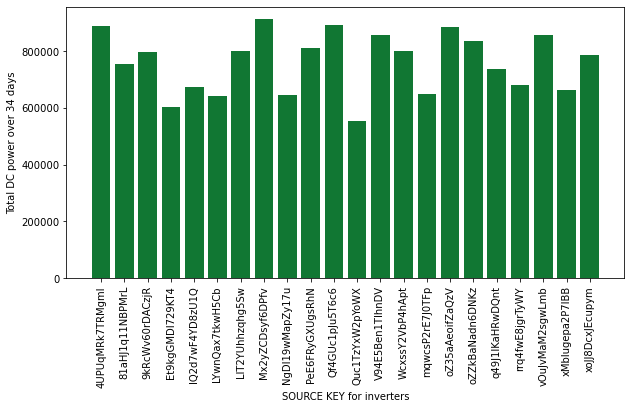

In [24]:
# which SOURCE_KEY has produced max DC_Power
TotalProducedDC = datasetGD2.groupby(["SOURCE_KEY"]).DC_POWER.sum().reset_index()
print(TotalProducedDC)
maxDCPower_inverter = TotalProducedDC['DC_POWER'].max()
maxDCPower_index = TotalProducedDC['DC_POWER'].idxmax()
MaxDCPower_inverter = TotalProducedDC['SOURCE_KEY'][10]
print('\n Maximum prodcued DC power:\n\n',maxDCPower_inverter)
print('\n The index of maximum prodcued DC power:\n\n',maxDCPower_index)
print('\n The Source Key of the inverter giving the maximum prodcued DC power:\n\n',MaxDCPower_inverter)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.xticks(rotation='vertical')
ax.bar(TotalProducedDC['SOURCE_KEY'], TotalProducedDC['DC_POWER'], color= '#117733')

ax.set_xlabel('SOURCE KEY for inverters')
ax.set_ylabel('Total DC power over 34 days')

# Which SOURCE_KEY has produced max AC_Power

         SOURCE_KEY       AC_POWER
0   4UPUqMRk7TRMgml  867688.151550
1   81aHJ1q11NBPMrL  735648.671081
2   9kRcWv60rDACzjR  779819.329933
3   Et9kgGMDl729KT4  588615.708104
4   IQ2d7wF4YD8zU1Q  657492.579189
5   LYwnQax7tkwH5Cb  626022.753183
6   LlT2YUhhzqhg5Sw  782521.577770
7   Mx2yZCDsyf6DPfv  890317.270321
8   NgDl19wMapZy17u  629927.405301
9   PeE6FRyGXUgsRhN  792664.868701
10  Qf4GUc1pJu5T6c6  870755.655462
11  Quc1TzYxW2pYoWX  542014.929794
12  V94E5Ben1TlhnDV  835443.639984
13  WcxssY2VbP4hApt  781608.549098
14  mqwcsP2rE7J0TFp  634944.647197
15  oZ35aAeoifZaQzV  865435.791964
16  oZZkBaNadn6DNKz  815637.897502
17  q49J1IKaHRwDQnt  721060.844115
18  rrq4fwE8jgrTyWY  667002.354956
19  vOuJvMaM2sgwLmb  835012.155241
20  xMbIugepa2P7lBB  646458.728993
21  xoJJ8DcxJEcupym  767932.701010

 Maximum prodcued AC power:

 890317.2703213454

 The index of maximum prodcued AC power:

 7

 The Source Key of the inverter giving the maximum prodcued AC power:

 Qf4GUc1pJu5T6c6


Text(0, 0.5, 'Total AC power over 34 days')

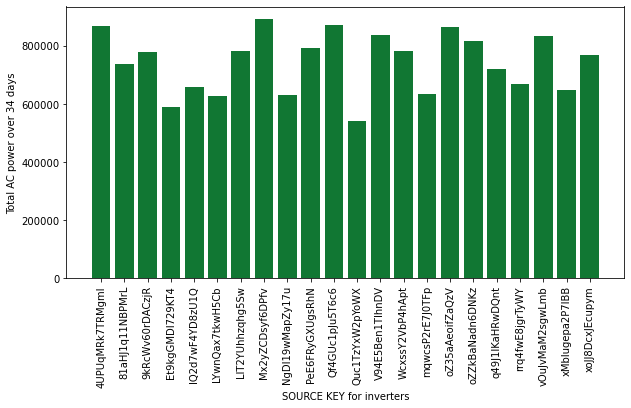

In [25]:
# which SOURCE_KEY has produced max AC_Power
TotalProducedAC = datasetGD2.groupby(["SOURCE_KEY"]).AC_POWER.sum().reset_index()
print(TotalProducedAC)
maxACPower_inverter = TotalProducedAC['AC_POWER'].max()
maxACPower_index = TotalProducedAC['AC_POWER'].idxmax()
MaxACPower_inverter = TotalProducedAC['SOURCE_KEY'][10]
print('\n Maximum prodcued AC power:\n\n',maxACPower_inverter)
print('\n The index of maximum prodcued AC power:\n\n',maxACPower_index)
print('\n The Source Key of the inverter giving the maximum prodcued AC power:\n\n',MaxACPower_inverter)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.xticks(rotation='vertical')
ax.bar(TotalProducedAC['SOURCE_KEY'], TotalProducedAC['AC_POWER'], color= '#117733')

ax.set_xlabel('SOURCE KEY for inverters')
ax.set_ylabel('Total AC power over 34 days')


# Rank the inverters based on the total DC power they produce over 34 days

In [26]:
# Rank the inverters based on the total DC power they produce over 34 days
TotalProducedDC = datasetGD2.groupby(["SOURCE_KEY"]).DC_POWER.sum().reset_index()
# add a new column for rank
TotalProducedDC['rank'] = TotalProducedDC['DC_POWER'].rank(ascending=False)
#print(TotalProducedDC)
# sort based on rank
SortTotalProducedDC = TotalProducedDC.sort_values('rank')
TotalProducedDC.sort_values('rank')


,SOURCE_KEY,DC_POWER,rank
7,Mx2yZCDsyf6DPfv,910617.270808,1.0
10,Qf4GUc1pJu5T6c6,890596.324322,2.0
0,4UPUqMRk7TRMgml,887444.875348,3.0
15,oZ35aAeoifZaQzV,885151.874261,4.0
12,V94E5Ben1TlhnDV,854375.668930,5.0
19,vOuJvMaM2sgwLmb,854172.894243,6.0
16,oZZkBaNadn6DNKz,834046.999676,7.0
9,PeE6FRyGXUgsRhN,810478.778457,8.0
6,LlT2YUhhzqhg5Sw,800062.652611,9.0
13,WcxssY2VbP4hApt,799350.243035,10.0


Text(0, 0.5, 'Ranked Total DC power over 34 days')

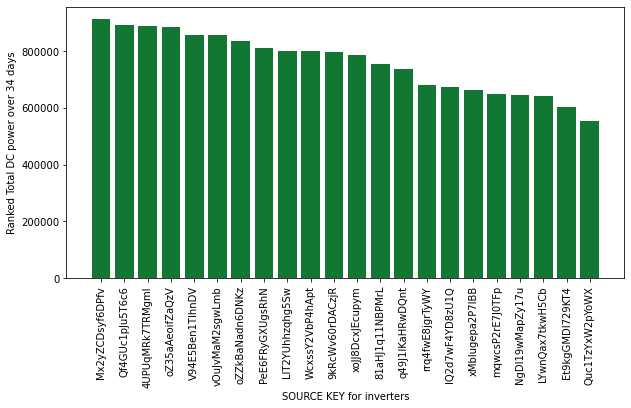

In [27]:
# Graph for Rank the inverters based on the total DC power they produce over 34 days
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.bar(SortTotalProducedDC['SOURCE_KEY'], SortTotalProducedDC['DC_POWER'], color= '#117733')

plt.xticks(rotation='vertical')
ax.set_xlabel('SOURCE KEY for inverters')
ax.set_ylabel('Ranked Total DC power over 34 days')


# Rank the inverters based on the total AC power they produce over 34 days

In [28]:
# Rank the inverters based on the total AC power they produce over 34 days
TotalProducedAC = datasetGD2.groupby(["SOURCE_KEY"]).AC_POWER.sum().reset_index()
# add a new column for rank
TotalProducedAC['rank'] = TotalProducedAC['AC_POWER'].rank(ascending=False)
#print(TotalProducedDC)
# sort based on rank
SortTotalProducedAC = TotalProducedAC.sort_values('rank')
TotalProducedAC.sort_values('rank')


,SOURCE_KEY,AC_POWER,rank
7,Mx2yZCDsyf6DPfv,890317.270321,1.0
10,Qf4GUc1pJu5T6c6,870755.655462,2.0
0,4UPUqMRk7TRMgml,867688.151550,3.0
15,oZ35aAeoifZaQzV,865435.791964,4.0
12,V94E5Ben1TlhnDV,835443.639984,5.0
19,vOuJvMaM2sgwLmb,835012.155241,6.0
16,oZZkBaNadn6DNKz,815637.897502,7.0
9,PeE6FRyGXUgsRhN,792664.868701,8.0
6,LlT2YUhhzqhg5Sw,782521.577770,9.0
13,WcxssY2VbP4hApt,781608.549098,10.0


Text(0, 0.5, 'Ranked Total AC power over 34 days')

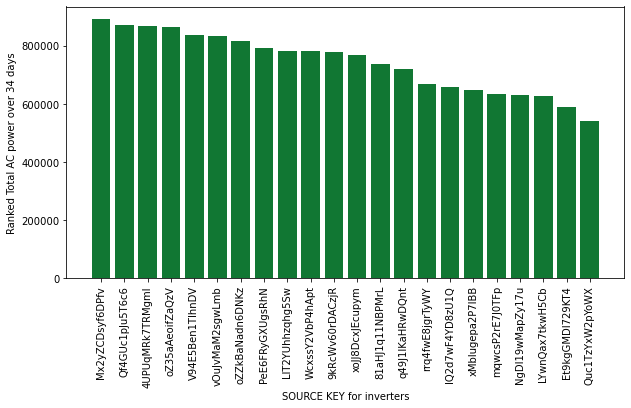

In [29]:
# Graph for Rank the inverters based on the total AC power they produce over 34 days
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.bar(SortTotalProducedAC['SOURCE_KEY'],SortTotalProducedAC['AC_POWER'], color= '#117733')

plt.xticks(rotation='vertical')
ax.set_xlabel('SOURCE KEY for inverters')
ax.set_ylabel('Ranked Total AC power over 34 days')


# Graphs that Explain The Patterns For ttributes Independent of Other Variables

Text(0, 0.5, 'DC_POWER')

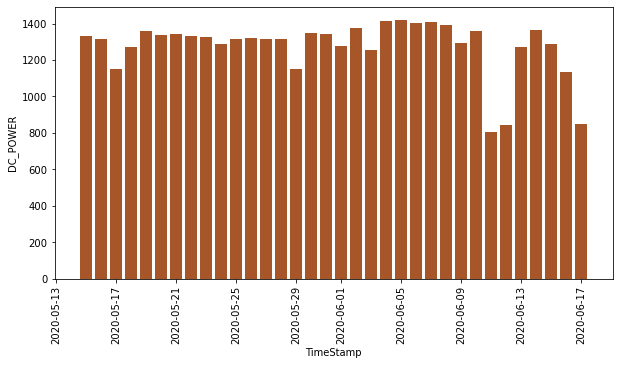

In [30]:
# plot nTimeStamp for DC_POWER
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.bar(datasetGD2['date'], datasetGD2['DC_POWER'], color= '#a65628')

plt.xticks(rotation='vertical')
ax.set_xlabel('TimeStamp')
ax.set_ylabel('DC_POWER')


Text(0, 0.5, 'AC_POWER')

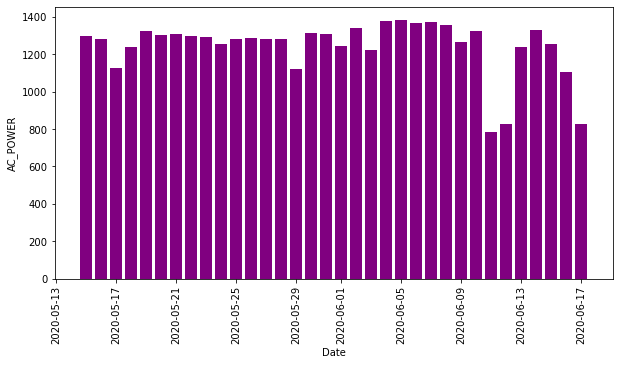

In [31]:
# plot nTimeStamp for AC_POWER
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.bar(datasetGD2['date'], datasetGD2['AC_POWER'], color= 'purple')

plt.xticks(rotation='vertical')
ax.set_xlabel('Date')
ax.set_ylabel('AC_POWER')



Text(0, 0.5, 'DAILY_YIELD')

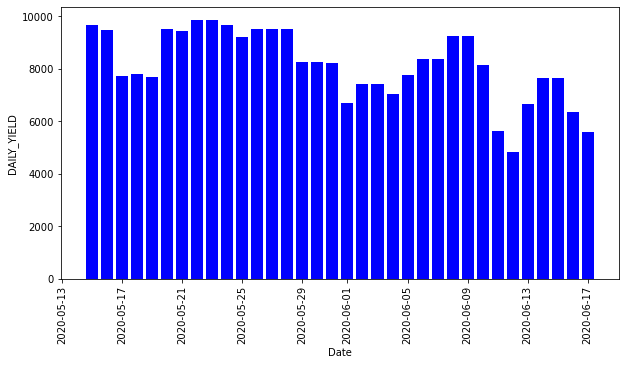

In [32]:
# plot nTimeStamp for DAILY_YIELD
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.bar(datasetGD2['date'], datasetGD2['DAILY_YIELD'], color= 'blue')

plt.xticks(rotation='vertical')
ax.set_xlabel('Date')
ax.set_ylabel('DAILY_YIELD')



Text(0, 0.5, 'TOTAL_YIELD')

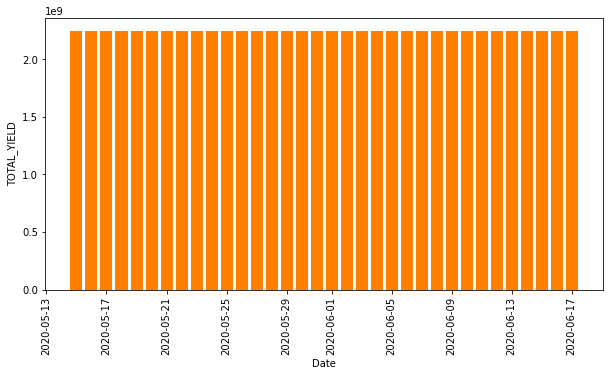

In [33]:
# plot nTimeStamp for TOTAL_YIELD
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.bar(datasetGD2['date'], datasetGD2['TOTAL_YIELD'], color= '#ff7f00')

plt.xticks(rotation='vertical')
ax.set_xlabel('Date')
ax.set_ylabel('TOTAL_YIELD')



In [34]:
datasetGD2['date'] = np.array(datasetGD2['date'])
datasetGD2['date']

0       2020-05-15
1       2020-05-15
2       2020-05-15
3       2020-05-15
4       2020-05-15
           ...    
67693   2020-06-17
67694   2020-06-17
67695   2020-06-17
67696   2020-06-17
67697   2020-06-17
Name: date, Length: 67698, dtype: datetime64[ns]

<ipython-input-36-8e16ef2c59c0>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(datasetGD2['date'])


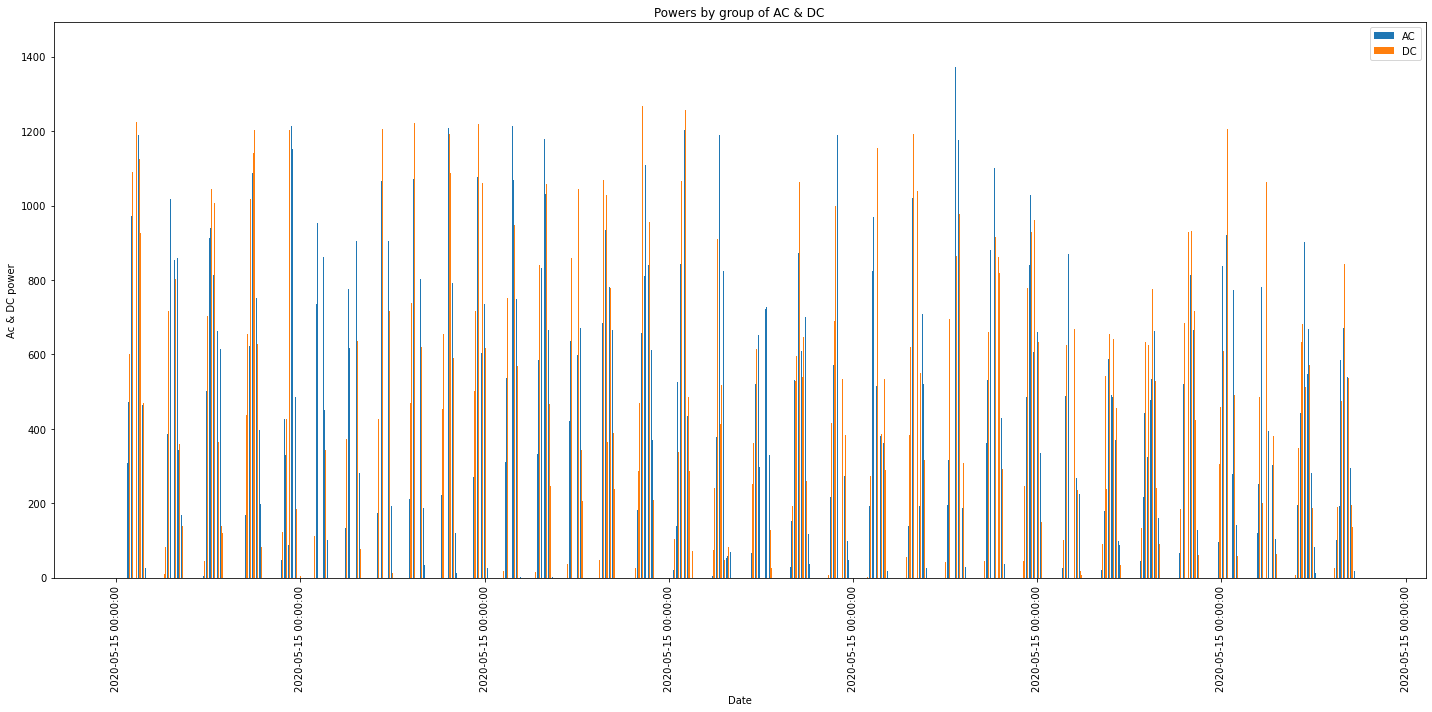

In [36]:
x = np.arange(len(datasetGD2['date']))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, datasetGD2['AC_POWER'], width, label='AC')
rects2 = ax.bar(x + width/2, datasetGD2['DC_POWER'], width, label='DC')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Powers by group of AC & DC')
ax.set_xlabel('Date')
ax.set_ylabel('Ac & DC power')
plt.xticks(rotation='vertical')


#ax.set_xticks(x)
ax.set_xticklabels(datasetGD2['date'])
ax.legend()


fig.tight_layout()
plt.xticks(rotation='vertical')
plt.show()